# Ethereum (ETH) Price Prediction using Machine Learning (SVR)

This project attempts to predict the future price of ETH using SVR.

**Support Vector Regression (SVR)** is a ML algorithm used for regression tasks. It aims to predict continuous values - like stock prices, house prices or temperature - based on data patterns.

SVR is based on the same idea as **Support Vector Machines (SVM)** which are often used for classification. But instead of finding a boundary between 2 classes, it tries to find a line or curve that best fits the data.

## Load data

In [35]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
# Load the ETH data
df = yf.download('ETH', start='2021-01-01', end='2025-04-13', auto_adjust=False, multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


In [25]:
future_days = 5

In [26]:
# Create a new column with our target
df[str(future_days)+'_Day_Price_Forecast'] = df[['Close']].shift(-future_days)


In [28]:
df[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
Date,,
2024-07-23,32.700001,30.799999
2024-07-24,31.700001,30.799999
2024-07-25,29.400000,29.400000
2024-07-26,30.799999,28.299999
2024-07-29,31.200001,22.700001
...,...,...
2025-04-07,14.520000,NaN
2025-04-08,13.770000,NaN
2025-04-09,15.440000,NaN


In [39]:
# Set the data for the models
X = np.array(df[["Close"]])
X = X[:df.shape[0]-future_days]

y = np.array(df[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]

In [41]:
# Split data
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
# Model
svr_rbf = SVR(C=8e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=8000.0, gamma=0.1)

In [84]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
svr_rbf_confidence

0.8032247316867644

In [85]:
svm_prediction = svr_rbf.predict(x_test)

Text(0, 0.5, 'Price USD ($)')

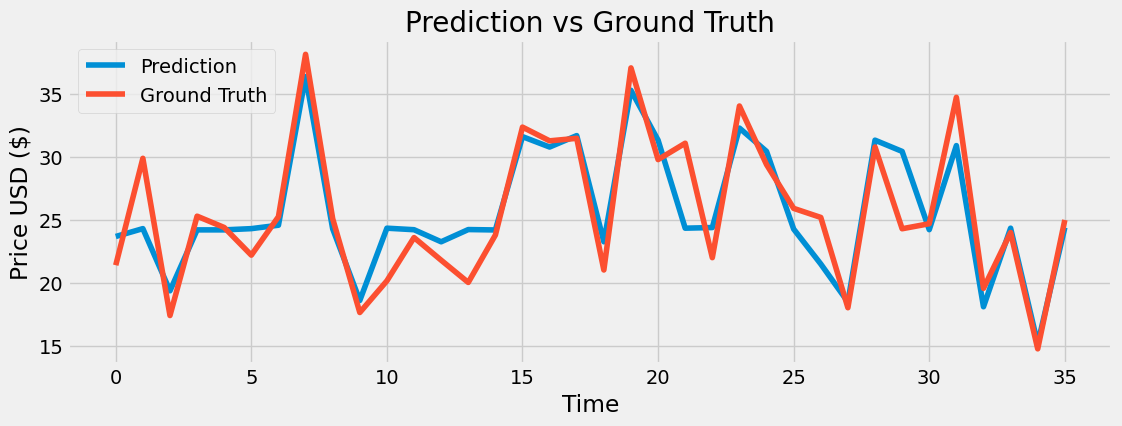

In [87]:
# Visualise
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label= 'Prediction')
plt.plot(y_test, label='Ground Truth')
plt.legend(['Prediction', 'Ground Truth'], loc='upper left')
plt.title('Prediction vs Ground Truth')
plt.xlabel('Time')
plt.ylabel('Price USD ($)')
